In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
df = pd.read_csv('poly.csv')
x = df[['x']].values
y = df['y'].values

In [3]:
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


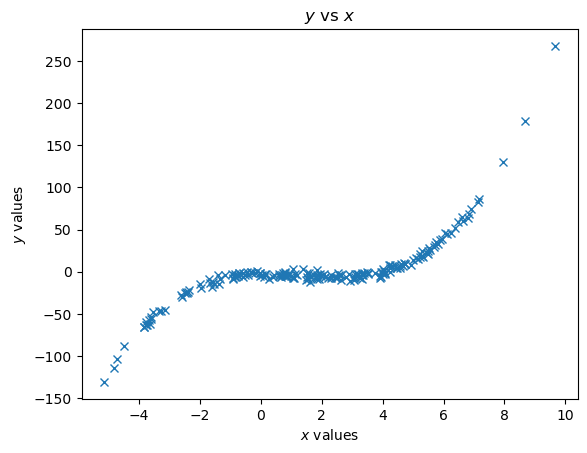

In [4]:
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [5]:
model = LinearRegression()
model.fit(x,y)

y_lin_pred = model.predict(x)

In [6]:
guess_degree = 3

x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)


In [7]:
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [8]:
x_l = np.linspace(np.min(x),np.max(x),100).reshape(-1, 1)

y_lin_pred_l = model.predict(x_l)

x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

y_poly_pred_l = polymodel.predict(x_poly_l)

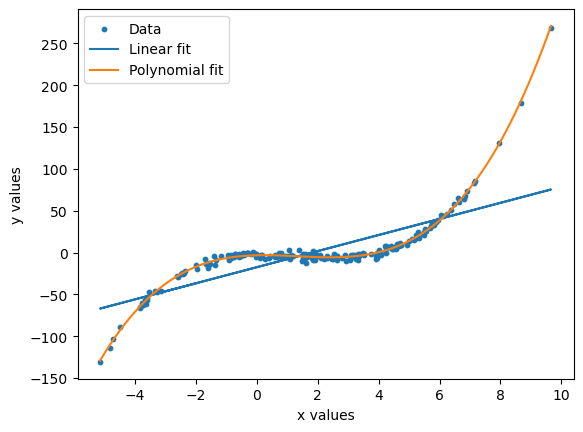

In [9]:
plt.scatter(x, y, s=10, label="Data")

plt.plot(x,y_lin_pred,label="Linear fit")

plt.plot(x_l,y_poly_pred_l, label="Polynomial fit")

plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [10]:
poly_residuals = (y - y_poly_pred)


In [11]:
lin_residuals = (y - y_lin_pred)

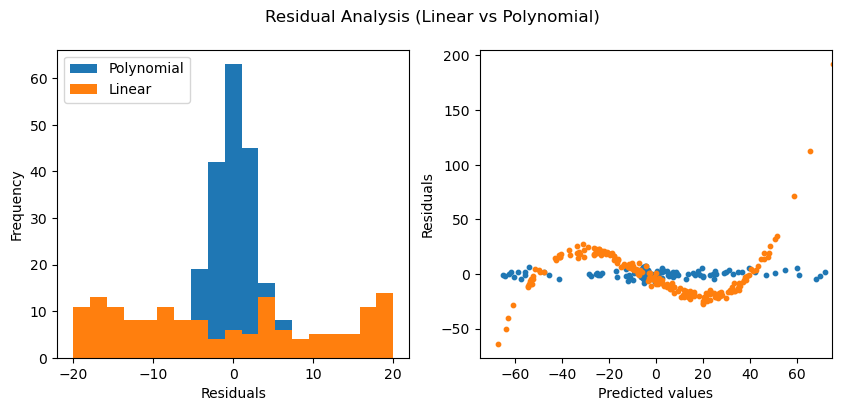

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[0].hist(poly_residuals, bins,label = 'Polynomial')
ax[0].hist(lin_residuals, bins, label = 'Linear')
ax[0].legend(loc = 'upper left')

ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s= 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');